# Α. Στοιχεία Ομάδας
***

|Όνομα|ΑΜ|Ομάδα|
|-|-|-|
|Λιάτσος Γεώργιος-Ελευθέριος|03114026|Α11|
|Κουτρούλης Σπυραντώνης     |03114864|Α11|

In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy


Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)
    100% |████████████████████████████████| 8.9MB 2.8MB/s 
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
    100% |████████████████████████████████| 13.9MB 2.7MB/s 
thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.1.0)


***
# Β. Εισαγωγή του dataset
***

### B1. Παρουσίαση του dataset
Τα δεδομένα δημιουργούνται από το MC (Monte Carlo program) για την προσομοίωση της εγγραφής σωματιδίων γάμμα  υψηλής ενέργειας σε ένα γειωμένο γήινο τηλεσκόπιο Cherenkov με βάση τη γη, χρησιμοποιώντας την τεχνική απεικόνισης


In [2]:
import pandas as pd
import numpy as np

x = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data",header=None,sep=',')
print(x.shape)
x.head()


(19020, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### B2. Δείγματα και χαρακτηριστικά 

Το μέγεθος του dataset το βρήκαμε απο πάνω. Οπότε ο αριθμός των δειγμάτων είναι 19020 και ο αριθμός των χαρακτηριστικών είναι 10 + 1 η κλαση

Τα χαρακτηριστικά όπως και το είδος τους αναγράφονται στην κεντρική σελίδα του MAGIC Gamma Telescope Data Set και είναι τα εξής : 
        1.  fLength:  continuous  # major axis of ellipse [mm]
        2.  fWidth:   continuous  # minor axis of ellipse [mm] 
        3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
        4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
        5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
        6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
        7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
        8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
        9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
       10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
       11.  class:    g,h         # gamma (signal), hadron (background)
 
 #### Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά 

In [3]:
attributes = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
for i in range(0,11):
    x.rename(columns = {i:attributes[i]},inplace=True)
x

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


Παρατηρούμε πως όλα τα αντικείμενα της κλάσης g δίνονται στις αρχικές θέσεις του dataset, ενώ όλα τις κλάσης h στις τελικές. Επιλέγουμε να ανακατέψουμε το δείγμα μας.  

In [4]:
from sklearn.utils import shuffle
x = shuffle(x).reset_index(drop=True)
x.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,19.3306,12.2520,2.6767,0.5511,0.2770,9.4368,14.7230,-6.3487,80.6287,112.5059,h
1,23.3895,17.1735,2.5334,0.4305,0.2592,2.1210,18.7541,-7.6769,12.6605,62.3795,g
2,24.3764,14.5840,2.8487,0.5117,0.3050,9.7548,-11.7233,-7.6942,5.6969,208.7264,h
3,39.1154,23.9109,3.1608,0.2238,0.1233,12.9861,30.1010,13.9471,4.2530,118.8900,g
4,25.6047,15.4880,2.6785,0.3732,0.2044,7.0597,15.4399,-10.2837,35.3889,112.8150,g


### Β3. Επικεφαλίδες και αρίθμηση γραμμών

Όταν πρωτοδιαβάσαμε το αρχείο παρατηρήσαμε πως δεν υπάρχει επικεφαλίδα οπότε με την επιλογή header=None της εντολής read_table της βιβλιοθήκης pandas εξασφαλίσαμε μια ομαλή απεικόνιση. Όσον αφορά την αρίθμηση, το αρχείο δεν περιείχε απο μόνο του οπότε αφήσαμε το pandas να κάνει τη δουλειά του indexing με τη δική του αρίθμηση. 

### Β4. Κλάσεις

Εύκολα μπορούμε να δούμε απο πάνω πως η κολόνα class βρίσκεται στην 11η θέση και από τα χαρακτηριστικά φαίνεται πως οι ετικέτες των κλάσεων είναι 2 : g,h

 ### Β5. Μετατροπές στο αρχείο

- header = None για να διαβάσουμε το αρχείο χωρίς επικεφαλίδα
- sep = "," Στην αρχική μορφή όλα τα data ανά στήλη χωρίζονται μεταξύ τους με "," , οπότε εξασφαλίζουμε η εντολή read_table να διαβάσει μόνο τα στοιχεία
- Δημιουργήσαμε τον πίνακα με τα attributes και τον προσαρμόσαμε στο dataframe
- Ανακατέψαμε το δείγμα για να υπάρχουν objects και των δύο κλάσεων σε τυχαίες θέσεις του.


### B6. Απουσιάζουσες τιμές


In [5]:
x.isnull().values.any()

False

Ελέγχουμε αν υπάρχουν απουσιάζουσες τιμές. **Δεν υπάρχουν.**

### B7. Έλεγχος εξισορροπημένου dataset

In [6]:
from sklearn import preprocessing

# Έλεγχος μονο της στήλης class
y = x.loc[:,'class']

# Get dummies για τα classes μας
y = pd.get_dummies(y)

# Εύρεση ποσοστών δειγμάτων επί του συνόλου
avg = (y.T.sum(axis=1))/x.shape[0]
print("g samples are", avg[0]*100,"% of the dataset")
print("h samples are", avg[1]*100,"% of the dataset")


g samples are 64.83701366982125 % of the dataset
h samples are 35.16298633017876 % of the dataset


To binary αυτό dataset ειναι **ΜΗ ΙΣΟΡΡΟΠΗΜΕΝΟ** γιατί έχουμε την κλάση g στο 65% σχεδόν των δειγμάτων ενώ την h στο 35% περίπου.

### B8. Διαχωρισμός σε train και test set (30%)

In [0]:
from sklearn.model_selection import train_test_split

features = np.array(x.drop(['class'],1))
labels = np.array(x['class'])

train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.3)

***
# Γ. Baseline classification
***

## ***Γ1. Train - Test ***

Δημιουργούμε μια συνάρτηση, την ***mets*** που θα τυπώνει και θα επιστρέφει τις f1 micro και macro για κάθε ταξινομητή, καθώς και μία άλλη συνάρτηση, την ***conmat*** που θα δημιουργεί και θα τυπώνει το confusion matrix του κάθε ταξινομητή στη μορφή που θέλουμε, καθώς και το classification report. 

In [0]:
from sklearn.metrics import f1_score

def mets(lbls,prds,name):    
    f1_micro = f1_score(lbls, prds,average='micro')
    f1_macro = f1_score(lbls, prds,average='macro')
    print("**" + name + " AVGS**")
    print("f1 micro avg = " ,f1_micro)
    print("f1 macro avg = " ,f1_macro,"\n")
    return [f1_micro,f1_macro]
       

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def conmat(lbls,prds,lb_names):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(lbls, prds)
    df = pd.DataFrame(cnf_matrix)
    df.columns = lb_names
    df['Class'] = lb_names
    df.set_index("Class",inplace=True)     
    print(classification_report(lbls, prds, target_names=lb_names))
    return df


## a) Dummy 


Για τον Dummy ταξινομητή, επιλέξαμε να μην παρουσιάσουμε τα αποτελέσματα μόνο για τη deafult στρατηγική (stratified), αλλά και για τις υπόλοιπες στρατηγικές του, μιας και δε θα ασχοληθούμε άλλο μαζί του στο μέρος Δ.

### Dummy Metrics

In [10]:
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_g = DummyClassifier(strategy="constant", constant='g')
dc_constant_h = DummyClassifier(strategy="constant", constant='h')
dc_stratified = DummyClassifier(strategy="stratified")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_prior = DummyClassifier(strategy="prior")

#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)

dc_uniform.fit(train, train_labels)
dc_constant_g.fit(train, train_labels)
dc_constant_h.fit(train, train_labels)
dc_stratified.fit(train, train_labels)
dc_most_frequent.fit(train, train_labels)
dc_prior.fit(train, train_labels)

#με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
preds_uniform = dc_uniform.predict(test)
preds_constant_g = dc_constant_g.predict(test)
preds_constant_h = dc_constant_h.predict(test)
preds_stratified = dc_stratified.predict(test)
preds_most_frequent = dc_most_frequent.predict(test)
preds_prior = dc_prior.predict(test)

dummy_metrics_uniform = mets(test_labels,preds_uniform,"DUMMY UNIFORM")
dummy_metrics_g = mets(test_labels,preds_constant_g,"DUMMY G")
dummy_metrics_h = mets(test_labels,preds_constant_h,"DUMMY H")
dummy_metrics_stratified = mets(test_labels,preds_stratified,"(DEFAULT) STRATIFIED")
dummy_metrics_most_frequent = mets(test_labels,preds_most_frequent,"MOST FREQUENT")
dummy_metrics_prior = mets(test_labels,preds_prior,"PRIOR")

**DUMMY UNIFORM AVGS**
f1 micro avg =  0.5066596565019278
f1 macro avg =  0.4946116978724776 

**DUMMY G AVGS**
f1 micro avg =  0.6437083771468629
f1 macro avg =  0.39161957564772365 

**DUMMY H AVGS**
f1 micro avg =  0.35629162285313704
f1 macro avg =  0.2626954386871689 

**(DEFAULT) STRATIFIED AVGS**
f1 micro avg =  0.5418857343147564
f1 macro avg =  0.49851701685170224 

**MOST FREQUENT AVGS**
f1 micro avg =  0.6437083771468629
f1 macro avg =  0.39161957564772365 

**PRIOR AVGS**
f1 micro avg =  0.6437083771468629
f1 macro avg =  0.39161957564772365 



### Dummy Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

label_names = np.array(['g','h'])

print('\n Uniform Matices \n')
uni_conmat = conmat(test_labels,preds_uniform,label_names)
uni_conmat


 Uniform Matices 

              precision    recall  f1-score   support

           g       0.65      0.51      0.57      3673
           h       0.36      0.49      0.42      2033

   micro avg       0.51      0.51      0.51      5706
   macro avg       0.50      0.50      0.49      5706
weighted avg       0.54      0.51      0.52      5706



,g,h
Class,,
g,1886,1787
h,1028,1005


In [12]:
print('\n Constant g Matices \n')
constant_g_conmat = conmat(test_labels,preds_constant_g,label_names)
constant_g_conmat


 Constant g Matices 

              precision    recall  f1-score   support

           g       0.64      1.00      0.78      3673
           h       0.00      0.00      0.00      2033

   micro avg       0.64      0.64      0.64      5706
   macro avg       0.32      0.50      0.39      5706
weighted avg       0.41      0.64      0.50      5706



,g,h
Class,,
g,3673,0
h,2033,0


In [13]:
print('\n Constant h Matices \n')
constant_h_conmat = conmat(test_labels,preds_constant_g,label_names)
constant_h_conmat


 Constant h Matices 

              precision    recall  f1-score   support

           g       0.64      1.00      0.78      3673
           h       0.00      0.00      0.00      2033

   micro avg       0.64      0.64      0.64      5706
   macro avg       0.32      0.50      0.39      5706
weighted avg       0.41      0.64      0.50      5706



,g,h
Class,,
g,3673,0
h,2033,0


In [14]:
print('\n Stratified Matices \n')
stratified_conmat = conmat(test_labels,preds_stratified,label_names)
stratified_conmat


 Stratified Matices 

              precision    recall  f1-score   support

           g       0.64      0.65      0.65      3673
           h       0.35      0.35      0.35      2033

   micro avg       0.54      0.54      0.54      5706
   macro avg       0.50      0.50      0.50      5706
weighted avg       0.54      0.54      0.54      5706



,g,h
Class,,
g,2385,1288
h,1326,707


In [15]:
print('\n Most Frequent Matices \n')
most_frequent_conmat = conmat(test_labels,preds_most_frequent,label_names)
most_frequent_conmat


 Most Frequent Matices 

              precision    recall  f1-score   support

           g       0.64      1.00      0.78      3673
           h       0.00      0.00      0.00      2033

   micro avg       0.64      0.64      0.64      5706
   macro avg       0.32      0.50      0.39      5706
weighted avg       0.41      0.64      0.50      5706



,g,h
Class,,
g,3673,0
h,2033,0


In [16]:
print('\n Prior Matices \n')
prior_conmat = conmat(test_labels,preds_prior,label_names)
prior_conmat


 Prior Matices 

              precision    recall  f1-score   support

           g       0.64      1.00      0.78      3673
           h       0.00      0.00      0.00      2033

   micro avg       0.64      0.64      0.64      5706
   macro avg       0.32      0.50      0.39      5706
weighted avg       0.41      0.64      0.50      5706



,g,h
Class,,
g,3673,0
h,2033,0


## b) Gaussian Naive Bayes

### GNB Metrics

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds_gnb = gnb.predict(test)

gnb_metrics = mets(test_labels,preds_gnb,"GNB")

**GNB AVGS**
f1 micro avg =  0.7253767963547143
f1 macro avg =  0.654871860886522 



### GNB Confusion Matrix


In [18]:
print("Gausian Naive Bayes Confusion Matrices \n")
gnb_conmat = conmat(test_labels,preds_gnb,label_names)
gnb_conmat

Gausian Naive Bayes Confusion Matrices 

              precision    recall  f1-score   support

           g       0.73      0.91      0.81      3673
           h       0.71      0.38      0.50      2033

   micro avg       0.73      0.73      0.73      5706
   macro avg       0.72      0.65      0.65      5706
weighted avg       0.72      0.73      0.70      5706



,g,h
Class,,
g,3359,314
h,1253,780


## c) kNN

### kNN Metrics

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train,train_labels)
preds_knn = knn.predict(test)

knn_metrics = mets(test_labels,preds_knn,"kNN")

**kNN AVGS**
f1 micro avg =  0.8003855590606379
f1 macro avg =  0.766232286364041 



### kNN Confusion Matrix

In [20]:
print("kNN Confusion Matrices \n")
knn_conmat = conmat(test_labels,preds_knn,label_names)
knn_conmat

kNN Confusion Matrices 

              precision    recall  f1-score   support

           g       0.80      0.92      0.86      3673
           h       0.80      0.59      0.68      2033

   micro avg       0.80      0.80      0.80      5706
   macro avg       0.80      0.75      0.77      5706
weighted avg       0.80      0.80      0.79      5706



,g,h
Class,,
g,3374,299
h,840,1193


## d) MLP

### MLP Metrics

In [85]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1,))
mlp.fit(train, train_labels)
preds_mlp = mlp.predict(test)

mlp_metrics = mets(test_labels,preds_mlp,"MLP")

**MLP AVGS**
f1 micro avg =  0.64931650893796
f1 macro avg =  0.4106769930745795 



### MLP Confusion Matrix


In [86]:
print("Multi-layer Perceptron Confusion Matrices \n")
mlp_conmat = conmat(test_labels,preds_mlp,label_names)
mlp_conmat

Multi-layer Perceptron Confusion Matrices 

              precision    recall  f1-score   support

           g       0.65      1.00      0.79      3673
           h       0.88      0.02      0.04      2033

   micro avg       0.65      0.65      0.65      5706
   macro avg       0.76      0.51      0.41      5706
weighted avg       0.73      0.65      0.52      5706



,g,h
Class,,
g,3668,5
h,1996,37


## ***Γ2. Bar Plot***

Τυπώνουμε τα f1-metrics των ταξινομητών, πλην των most_frequent και prior, τα οποία όπως αναμέναμε έχουν τα ίδια metrics με το constant_g, αφού το dataset είναι μη ισορροπημένο με τα δείγματα κλάσης g στο 65% περίπου. 

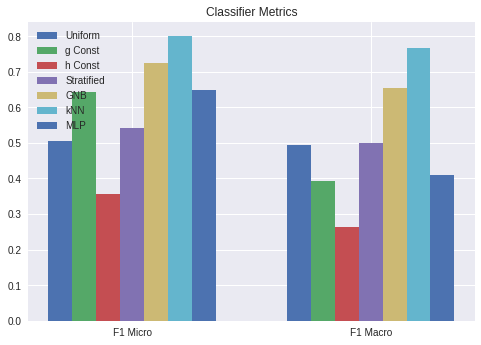

In [88]:
from matplotlib import pyplot as plt

x_axis = ['F1 Micro','F1 Macro']

ind = np.arange(len(x_axis))

plt.xticks(ind,x_axis)

plt.title("Classifier Metrics")
plt.bar(ind-0.3,dummy_metrics_uniform,width=0.1,label="Uniform") 
plt.bar(ind-0.2,dummy_metrics_g,width=0.1,label="g Const") 
plt.bar(ind-0.1,dummy_metrics_h,width=0.1,label="h Const") 
plt.bar(ind,dummy_metrics_stratified,width=0.1,label="Stratified") 
plt.bar(ind+0.1,gnb_metrics,width=0.1,label="GNB")
plt.bar(ind+0.2,knn_metrics,width=0.1,label="kNN") 
plt.bar(ind+0.3,mlp_metrics,width=0.1,label="MLP")
plt.legend()

## Γ3. Σχολιασμός Αποτελεσμάτων

Παρατηρούμε πως για τους ταξινομητές με default τιμές, και **MLP με ένα μόνο επίπεδο κρυφών νευρώνων**, καλύτερες μετρικές παρουσιάζει ο kNN με τον Gaussian Naive Βayes να ακολουθεί. 
(Σημειωτέον πως για default MLP, το οποίο έχει προφανώς περισσότερα επίπεδα κρυφών νευρώνων το MLP παρέχει τις καλύτερες μετρικές που ξεπερνάνε το 80%.) Η χειρότερη απόδοση προκύπτει όπως αναμέναμε από τον h-constant dummy, αφού το dataset είναι μη εξισορροπημένο. 

Παρατηρούμε στους Dummies από τους comfusion matrices πως σε πολλούς -όπως αναμέναμε- όλα τα δείγματα προβλέπεται πως ανήκουν σε μία τάξη και πως με stratified dummy οι τιμές precision και recall είναι ίσες για τις δύο κλάσεις ξεχωριστά. 

Παρατηρούμε ακόμη μεγάλη διαφορά στα δύο recall του kΝΝ και αυτό λόγω των False Negative προβλέψεων στις οποίες προβαίνει ο μη βελτιστοποιημένος ταξινομητής.

Στον GNB έχουμε ιδιαίτερα μικρό f1-score για την κλάση h, πάλι λόγω του αριθμού των αντικειμένων της, ενώ για τον MLP έχουμε ελάχιστες προβλέψεις αντικειμένου της κλασης h! Είναι και αυτό εξαιτίας της ιδιαιτερότητας στην εξισορρόπηση του dataset μας. Υπήρξαν για διαφορετικές εκτελέσεις και περιπτώσεις που κανένα στοιχείο δεν ταξινομήθηκε ως h!





***
# Δ. Βελτιστοποίηση ταξινομητών
***

## Δ1. Grid Search Cross Validation

In [24]:
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)


Εισάγουμε τις γνωστές μας κλάσεις για προεπεξεργασία δεδομένων.

Σημειωτέον επίσης πως χαριν απλότητας  παρουσίασης και επιτάχυνσης της εκτέλεσης δεν συμπεριλαμβάνονται όλοι οι δυνατοί συνδυασμοί pipeline, αλλά 7 ενδεικτικοί για κάθε ταξινομιτή και μετρική, ικανοί για να σημειωθούν οι διαφορές στα αποτελέσματα με την προσθήκη ή την αφαίρεση κάποιου σταδίου σωλήνωσης, αλλά και να μας οδηγήσουν (έπειτα και από πειραματική εξακρίβωση μέσω διαφορετικών εκτελέσεων) στη βέλτιστη κατά το δυνατόν ακρίβεια .


In [0]:
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τους μετασχηματιστές χωρίς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

Θα δημιουργήοσυμε επίσης μια συνάρτηση ***cv_best*** που αφου βρει αρχικά το βέλτιστο pipeline και τις βέλτιστες υπερπαραμέτρους για το cross validation, τις παραμέτρους που δίνουν δηλαδή καλύτερη ακρίβεια για τα δεδομένα του train set, θα κάνει predict στο test set μας, θα τυπώνει την αντίστοιχη μετρική και θα επιστρέφει τον estimator με τις βέλτιστες παραμέτρους.

In [0]:
import time

def cv_best(est,tr,trl,name):
    start_time = time.time()
    est.fit(tr,trl)
    preds = est.predict(test)
    print("Συνολικός χρόνος GridSearchCV: %s seconds" % (time.time() - start_time))
    cm = conmat(test_labels,preds,label_names)
    res = f1_score(test_labels, preds, average=name)
    print ('Optimum f1-',name,' is', res)
    return [est.best_estimator_,res,cm] 

***
## GNB
***

### Progressive Grid Search

Αρχικά, αναζητώντας τη variance για οποιοδήποτε από τους ταξινομητές που χρησιμοποιήσαμε στο μέρος Γ με την εντολή: train_variance = train.var(axis=0) προκύπτουν για διάφορα train sets που δοκιμάσαμε τιμές λίγο μεγαλύτερες από 5000. Ξεκινήσαμε λοιπόν αρικά με διάστημα αναζήτησης vthreshold = [0, 1000, 3000, 5000]. Παρατηρήσαμε πως κάθε φορά επιλεγόταν η τιμή 0, γεγονός που επαναλαμβανόταν για όλες τις μετατοπίσεις του διαστήματος που επιχειρούσαμε προς το 0, μέχρι τη δοκιμή [0,0.01,0.02,0.03,0.04] για την οποία επιλέχθηκε το 0.02.

Φτάσαμε λοιπόν μετά από δοκιμές στα εξής διαστήματα αναζήτησης:

- vthreshold = [0,0.01,0.02,0.03]
- n_components= [6,7,8]
- var_smoothing=[1e-08,1e-07,1e-06]

Για GridSearchCV σε ολόκληρο το train_set για f1-micro επιλέγεται το εξής pipeline:
     - (steps=[('selector', VarianceThreshold(threshold=0.02)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-08))])
  
 Συνολικός χρόνος GridSearchCV: 95.44038772583008 seconds
 
 Μετατοπίζουμε λοιπόν τα διαστήματα ωστε να φέρουμε στο κέντρο τους τις τιμές που επιλέχθηκαν, εκτός του pca_n_components που επιλέγεται σε όλες μας τις δοκιμές ίσο με 8 και δε μπορούμε να βάλουμε μεγαλύτερη τιμή, γιατί όταν ο selector αφαιρεί χαρακτηριστικά προκύπτει error κατά την εκτέλεση. Για αυτό το λόγο επιχειρήσαμε να δώσουμε τις τιμές [8,9,10] στο pipe που έχει pca και όχι selector, αλλά και πάλι βέλτιστο επιλέχθηκε αυτό που αποτελείται και από τα δύο στάδια.Επίσης, το var_smoothing για όλες τι δοκιμές μας να μετατοπίσουμε το εύρος αναζήτησης της τιμής του επιλέχθηκε ίσο με 1e-08. 
 
 Από αυτά επιλέγουμε τα διαστήματα αναζήτησης υπερπαραμετρων που παρουσιάζονται στον κώδικα παρακάτω:


In [0]:
vthreshold = [0.01,0.02,0.03]
n_components= [8]
var_smoothing=[1e-08,1e-07]

In [0]:
#Ορίζουμε τον gnb ταξινομητή
clf = GaussianNB()

gnb_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca',pca),('gnb', clf)], memory = 'tmp')

Για να εισάγουμε και τα διάφορα pipelines ως παραμέτρους προς cross validation, δημιουργήσαμε τη παρακάτω λίστα από dictionarys. Δίνουμε μεν ως pipeline το pipe που αποτελείται από όλα τα στάδια προεπεξεργασίας που έχουμε και τον ταξινομητή, όταν ωστόσο δίνεται η τιμή *None* σε κάποιο στάδιο εξ αυτών, αυτό αφαιρείται. Έτσι δημιουργήσαμε το παρακάτω grid με 7 pipelines.

Για τη δημιουργία του συμβουλευτήκαμε το διαδίκτυο, λαμβάνοντας ιδιαίτερη βοήθεια από τον εξής σύνδεσμο:

https://stackoverflow.com/questions/50265993/alternate-different-models-in-pipeline-for-gridsearchcv

In [0]:
gnb_params_grid = [dict(selector = [None], scaler = [None] , sampler = [None],pca = [None],gnb__var_smoothing = var_smoothing),
                   dict(selector = [None], scaler = [None] ,pca = [None],gnb__var_smoothing = var_smoothing),
                   dict(selector = [None], scaler = [None] ,pca__n_components = n_components,gnb__var_smoothing = var_smoothing),
                   dict(selector = [None], pca__n_components = n_components,gnb__var_smoothing = var_smoothing),    
                   dict(selector__threshold=vthreshold, scaler = [None] , sampler = [None],pca = [None],gnb__var_smoothing = var_smoothing),
                   dict(selector__threshold=vthreshold, sampler = [None],pca__n_components = n_components,gnb__var_smoothing = var_smoothing),
                   dict(selector__threshold=vthreshold,pca__n_components = n_components,gnb__var_smoothing = var_smoothing)]

In [0]:
from sklearn.model_selection import GridSearchCV

gnb_micro_estimator = GridSearchCV(gnb_pipe,param_grid=gnb_params_grid,cv=5, scoring='f1_micro', n_jobs=-1)
gnb_macro_estimator = GridSearchCV(gnb_pipe,param_grid=gnb_params_grid,cv=5, scoring='f1_macro', n_jobs=-1)

### a) f1- micro

In [31]:
gnb_micro = cv_best(gnb_micro_estimator,train,train_labels,'micro')
print('\nConfusion Matrix\n')
gnb_micro[2]

Συνολικός χρόνος GridSearchCV: 29.160797357559204 seconds
              precision    recall  f1-score   support

           g       0.76      0.91      0.83      3673
           h       0.75      0.48      0.58      2033

   micro avg       0.76      0.76      0.76      5706
   macro avg       0.76      0.69      0.71      5706
weighted avg       0.76      0.76      0.74      5706

Optimum f1- micro  is 0.757974062390466

Confusion Matrix



,g,h
Class,,
g,3359,314
h,1067,966


In [32]:
print("Optimum GNB f1-micro is",gnb_micro[0])

start_time = time.time()
gnb_micro[0].fit(train,train_labels)
preds = gnb_micro[0].predict(test)
gnb_micro_time = time.time() - start_time
print("\n Συνολικός χρόνος fit και predict: %s seconds \n" % gnb_micro_time)


Optimum GNB f1-micro is Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.02)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-08))])

 Συνολικός χρόνος fit και predict: 0.22082114219665527 seconds 



### b) f1- macro

In [33]:
gnb_macro = cv_best(gnb_macro_estimator,train,train_labels,'macro')
print('\nConfusion Matrix\n')
gnb_macro[2]

Συνολικός χρόνος GridSearchCV: 20.095083236694336 seconds
              precision    recall  f1-score   support

           g       0.77      0.86      0.82      3673
           h       0.69      0.54      0.61      2033

   micro avg       0.75      0.75      0.75      5706
   macro avg       0.73      0.70      0.71      5706
weighted avg       0.74      0.75      0.74      5706

Optimum f1- macro  is 0.7130202603593694

Confusion Matrix



,g,h
Class,,
g,3177,496
h,926,1107


In [34]:
print("Optimum GNB f1-macro is",gnb_macro[0])

start_time = time.time()
gnb_macro[0].fit(train,train_labels)
preds = gnb_macro[0].predict(test)
gnb_macro_time = time.time() - start_time
print("\n Συνολικός χρόνος fit και predict: %s seconds" % gnb_macro_time)

Optimum GNB f1-macro is Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.01)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-08))])

 Συνολικός χρόνος fit και predict: 0.3076786994934082 seconds


***
## kNN
***

Θα εκτελέσουμε αρχικά GridSearchCV στο 1/4 του trainset μας διότι είναι πολύ μεγάλο

In [0]:
quarter = train.shape[0] // 4
qtrain = train[1:quarter]
qtrain_labels = train_labels[1:quarter]

### Progressive Grid Search

Αντίστοιχα με πριν για το vthreshold δίνουμε στην GridSearchCV τα παρακάτω ορίσματα:
- vthreshold = [0.01,0.02,0.03]
- k = [11, 13, 15, 17]
- weights = ['uniform','distance']
- metric = ['euclidean','manhattan','chebyshev','minkowski']
και τρεχουμε για το 1/4 του train set μας καλώντας τη συνάρτηση cv_best δίνοντας για όρισμα τα qtrain και qtrain_labels. 

Για όλες τις εκτελέσεις μας το GridSearchCV επέλεξε *weight = distance* και *metric = manhattan* για βέλτιστη απόδοση,  για να προχωρήσουμε λοιπόν για τη διαδικασία σε oλκληρο το train set επιλέγουμε αυτές τις υπερπαραμέτρους ως βέλτιστες και συνεχίζουμε την αναζήτηση για τις αριθμητικές μας μεταβλητές. Για το k του classifier επιλέχθηκε η ακραία τιμή 17 οπότε μετατοπίζουμε το διάστημα προς την τιμή αυτή. Μετά απο μετατοπίσεις του διαστήματος k προς τα πάνω, είδαμε πως επιλέγεγεται η τιμή 17 για f1-micro και 21 για f1-macro, γι αυτό τρέξαμε και το τελικό cv στο παρακάτω διάστημα. Το var threshold βρίσκεται ήδη στο μέσο του διαστήματος αναζήτησης.

           (steps =['selector', VarianceThreshold(threshold=0.02)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),  ('sampler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
           weights='distance'))])
 
 Συνολικός χρόνος GridSearchCV: 273.32881831631907 seconds
           
  Μεταβάλουμε λοιπόν τις μεταβλητές όπως περιγράφηκε και δοκιμάζουμε, αυτή τη φορά για όλο το train set.
           

  


In [0]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

vthreshold = [0.01,0.02,0.03]
k = [17, 19,21] 
weights = ['distance']
metric = ['manhattan']

In [0]:
knn_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca',pca),('kNN', clf),], memory = 'tmp')

In [0]:
knn_params_grid = [dict(selector = [None], scaler = [None] , sampler = [None], pca = [None],kNN__n_neighbors=k,kNN__weights=weights, kNN__metric = metric),
                   dict(selector = [None], scaler = [None] ,pca = [None], kNN__n_neighbors=k,kNN__weights=weights, kNN__metric = metric),
                   dict(selector = [None], scaler = [None] ,pca__n_components = n_components, kNN__n_neighbors=k,kNN__weights=weights, kNN__metric = metric),
                   dict(selector = [None], pca__n_components = n_components,  kNN__n_neighbors=k,kNN__weights=weights, kNN__metric = metric),
                   dict(selector__threshold=vthreshold, scaler = [None] ,sampler = [None],pca=[None], kNN__n_neighbors=k,kNN__weights=weights, kNN__metric = metric),
                   dict(selector__threshold=vthreshold, sampler = [None],pca__n_components = n_components, kNN__n_neighbors=k,kNN__weights=weights, kNN__metric = metric),
                   dict(selector__threshold=vthreshold,pca__n_components = n_components, kNN__n_neighbors=k,kNN__weights=weights, kNN__metric = metric)]

In [0]:
knn_micro_estimator = GridSearchCV(knn_pipe,param_grid=knn_params_grid,cv=5, scoring='f1_micro', n_jobs=-1)
knn_macro_estimator = GridSearchCV(knn_pipe,param_grid=knn_params_grid,cv=5, scoring='f1_macro', n_jobs=-1)

### a) f1-micro

In [40]:
knn_micro = cv_best(knn_micro_estimator,train,train_labels,'micro')
print('\nConfusion Matrix\n')
knn_micro[2]

Συνολικός χρόνος GridSearchCV: 206.24187302589417 seconds
              precision    recall  f1-score   support

           g       0.81      0.95      0.87      3673
           h       0.86      0.58      0.70      2033

   micro avg       0.82      0.82      0.82      5706
   macro avg       0.83      0.77      0.78      5706
weighted avg       0.83      0.82      0.81      5706

Optimum f1- micro  is 0.8194882579740624

Confusion Matrix



,g,h
Class,,
g,3487,186
h,844,1189


In [41]:
print("Optimum kNN f1-micro is", knn_micro[0])

start_time = time.time()
knn_micro[0].fit(train,train_labels)
preds = knn_micro[0].predict(test)
knn_micro_time = (time.time() - start_time)
print("\n Συνολικός χρόνος fit και predict: %s seconds" % knn_micro_time )

Optimum kNN f1-micro is Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.02)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
           weights='distance'))])

 Συνολικός χρόνος fit και predict: 0.7407608032226562 seconds


### b) f1-macro

In [42]:
knn_macro = cv_best(knn_macro_estimator,train,train_labels,'macro')
print('\nConfusion Matrix\n')
knn_macro[2]

Συνολικός χρόνος GridSearchCV: 208.48526620864868 seconds
              precision    recall  f1-score   support

           g       0.84      0.87      0.86      3673
           h       0.76      0.70      0.73      2033

   micro avg       0.81      0.81      0.81      5706
   macro avg       0.80      0.79      0.79      5706
weighted avg       0.81      0.81      0.81      5706

Optimum f1- macro  is 0.7931577580672573

Confusion Matrix



,g,h
Class,,
g,3212,461
h,604,1429


In [43]:
print("Optimum kNN f1-macro is", knn_macro[0])

start_time = time.time()
knn_macro[0].fit(train,train_labels)
preds = knn_macro[0].predict(test)
knn_macro_time = (time.time() - start_time)
print("\n Συνολικός χρόνος fit και predict: %s seconds" % knn_macro_time )

Optimum kNN f1-macro is Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.02)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_compon...an',
           metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
           weights='distance'))])

 Συνολικός χρόνος fit και predict: 0.824897289276123 seconds


***
## MLP
***

### Progressive Grid Search

Παιρνουμε αρχικά το 1/8 του train set, etrain  γιατι αργεί πάρα πολύ!

In [0]:
eighth = qtrain.shape[0] // 2

etrain = qtrain[1:eighth]
etrain_labels = qtrain_labels[1:eighth]

Αρχικά βρίσκουμε τα ονόματα των παραμέτρων προς διερεύνηση  με την get_params().keys() . 

Για αυτές τις παραμέτρους ορίζουμε αρχικά τις παρακάτω μεταβλητές στα διαστήματα που αναγράφονται:

- vthreshold = [0,0.02,0.04]
- activation = ['identity', 'logistic', 'tanh', 'relu']
- solver = ['lbfgs','sgd','adam']
- max_iter = [100,200,300]
- alpha = [1e-5, 1e-4, 1e-6]

Οι εκτελέσεις σε ολοκληρο το train set είναι **αρκετά χρονοβόρες**.

    steps=[('selector', VarianceThreshold(threshold=0.005)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('MLP', MLPClassifier(activ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])
       
   (Το σύνολο των παραμέτρων που επιλέχθηκαν εμφανίστηκε με την get_params() σε κελί κώδικα παρακάτω και είχε alpha = 1e-05)    

Συνολικός χρόνος GridSearchCV: 287.92994594573975 seconds

Δοκιμάσαμε ξανά με πιο περιορισμένα εύρη παραμέτρων  και παρά τη (μικρή) μεταβολή των υπολοίπων παραμέτρων η παράμετρος max_iter παρέμενε ίση με 200 για όλα τα διαφορειτικά pipes και εκτελέσεις,δεν επιλέγει alpha = 1e-04, ούτε vthreshold = 0.04.

Απορρίπτουμε λοιπόν και τις τιμες max_iter = 300, alpha=1e-04 και vthreshold = 0.04 και προχωράμε με μεταβλητές τα vthreshold και alpha για ολόκληρο το trainset, μετατοπίζοντας τα διαστήματα της αναζήτησης σε [0,0.01,0.02] και [1e-5,1e-6,1e-7] και κατόπιν νέων παρατηρήσεων σε [0,0.005,0.01] και [1e-04,1e-5,1e-6] αντίστοιχα. 

Tρέχουμε τώρα για το περιορισμένο εύρος των παραμέτρων που βρήκαμε μέσω prograssive grid search τη διαδικασία σε ολόκληρο το train set επιτυγχάνοντας ύστερα από αρκετό χρόνο τα βέλτιστα αποτελέσματα.


In [0]:
clf = MLPClassifier(hidden_layer_sizes=(1,))

vthreshold = [0,0.005,0.01]
alpha = [1e-4,1e-5,1e-6]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs','sgd','adam']

In [0]:
mlp_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros),('pca',pca),('MLP', clf)], memory = 'tmp')

In [0]:
mlp_params_grid = [dict(selector = [None], scaler = [None] , sampler = [None], pca = [None], MLP__alpha=alpha,MLP__activation = activation,MLP__solver = solver),
                   dict(selector = [None], scaler = [None] ,pca = [None], MLP__alpha=alpha,MLP__activation = activation,MLP__solver = solver),
                   dict(selector = [None], scaler = [None] ,pca__n_components = n_components, MLP__alpha=alpha,MLP__activation = activation,MLP__solver = solver),
                   dict(selector = [None], pca__n_components = n_components, MLP__alpha=alpha,MLP__activation = activation,MLP__solver = solver),
                   dict(selector__threshold=vthreshold,scaler = [None], sampler = [None],pca = [None], MLP__alpha=alpha,MLP__activation = activation,MLP__solver = solver),
                   dict(selector__threshold=vthreshold, sampler = [None], pca__n_components = n_components,  MLP__alpha=alpha,MLP__activation = activation,MLP__solver = solver),
                   dict(selector__threshold=vthreshold,pca__n_components = n_components,MLP__alpha=alpha,MLP__activation = activation,MLP__solver = solver)]

In [0]:
mlp_micro_estimator = GridSearchCV(mlp_pipe,param_grid=mlp_params_grid,cv=5, scoring='f1_micro', n_jobs=-1)
mlp_macro_estimator = GridSearchCV(mlp_pipe,param_grid=mlp_params_grid,cv=5, scoring='f1_macro', n_jobs=-1)

### a) f1-micro

In [49]:
mlp_micro = cv_best(mlp_micro_estimator,train,train_labels,'micro')
print('\nConfusion Matrix\n')
mlp_micro[2]

Συνολικός χρόνος GridSearchCV: 2797.321962594986 seconds
              precision    recall  f1-score   support

           g       0.87      0.75      0.81      3673
           h       0.64      0.80      0.71      2033

   micro avg       0.77      0.77      0.77      5706
   macro avg       0.76      0.78      0.76      5706
weighted avg       0.79      0.77      0.77      5706

Optimum f1- micro  is 0.7691903259726602

Confusion Matrix



,g,h
Class,,
g,2770,903
h,414,1619


In [50]:
print("Optimum MLP f1-micro is ", mlp_micro[0])

start_time = time.time()
mlp_micro[0].fit(train,train_labels)
preds = mlp_micro[0].predict(test)
mlp_micro_time = (time.time() - start_time)
print("\n Συνολικός χρόνος fit και predict: %s seconds" % mlp_micro_time )

Optimum MLP f1-micro is  Pipeline(memory='tmp',
     steps=[('selector', None), ('scaler', None), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('MLP', ...e=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

 Συνολικός χρόνος fit και predict: 1.054440975189209 seconds


Προσθέσαμε την παρακάτω εντολή για να βρούμε ακριβώς τις παραμέτρους που δεν παρουσιάζονται λόγω μεγέθους στο προηγούμενο κελί κώδικα.

In [51]:
mlp_micro[0].get_params()


{'MLP': MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(1,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
        random_state=None, shuffle=True, solver='sgd', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False),
 'MLP__activation': 'relu',
 'MLP__alpha': 1e-06,
 'MLP__batch_size': 'auto',
 'MLP__beta_1': 0.9,
 'MLP__beta_2': 0.999,
 'MLP__early_stopping': False,
 'MLP__epsilon': 1e-08,
 'MLP__hidden_layer_sizes': (1,),
 'MLP__learning_rate': 'constant',
 'MLP__learning_rate_init': 0.001,
 'MLP__max_iter': 200,
 'MLP__momentum': 0.9,
 'MLP__n_iter_no_change': 10,
 'MLP__nesterovs_momentum': True,
 'MLP__power_t': 0.5,
 'MLP__random_state': None,
 'MLP__shuffle': True,
 'MLP__solver': 'sgd',
 'MLP__tol': 0.0001,
 'MLP__validation_fraction

### b) f1-macro

In [52]:
mlp_macro = cv_best(mlp_macro_estimator,train,train_labels,'macro')
print('\nConfusion Matrix\n')
mlp_macro[2]

Συνολικός χρόνος GridSearchCV: 2699.2427134513855 seconds
              precision    recall  f1-score   support

           g       0.83      0.87      0.85      3673
           h       0.74      0.69      0.71      2033

   micro avg       0.80      0.80      0.80      5706
   macro avg       0.79      0.78      0.78      5706
weighted avg       0.80      0.80      0.80      5706

Optimum f1- macro  is 0.7807278017445385

Confusion Matrix



,g,h
Class,,
g,3180,493
h,636,1397


In [53]:
print("Optimum MLP f1-macro is ", mlp_macro[0])

start_time = time.time()
mlp_macro[0].fit(train,train_labels)
preds = mlp_macro[0].predict(test)
mlp_macro_time = (time.time() - start_time)
print("\n Συνολικός χρόνος fit και predict: %s seconds" % mlp_macro_time )

Optimum MLP f1-macro is  Pipeline(memory='tmp',
     steps=[('selector', None), ('scaler', None), ('sampler', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('MLP', ...e=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

 Συνολικός χρόνος fit και predict: 1.1243007183074951 seconds


In [54]:
mlp_macro[0].get_params()


{'MLP': MLPClassifier(activation='tanh', alpha=1e-06, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(1,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
        random_state=None, shuffle=True, solver='sgd', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False),
 'MLP__activation': 'tanh',
 'MLP__alpha': 1e-06,
 'MLP__batch_size': 'auto',
 'MLP__beta_1': 0.9,
 'MLP__beta_2': 0.999,
 'MLP__early_stopping': False,
 'MLP__epsilon': 1e-08,
 'MLP__hidden_layer_sizes': (1,),
 'MLP__learning_rate': 'constant',
 'MLP__learning_rate_init': 0.001,
 'MLP__max_iter': 200,
 'MLP__momentum': 0.9,
 'MLP__n_iter_no_change': 10,
 'MLP__nesterovs_momentum': True,
 'MLP__power_t': 0.5,
 'MLP__random_state': None,
 'MLP__shuffle': True,
 'MLP__solver': 'sgd',
 'MLP__tol': 0.0001,
 'MLP__validation_fraction

## Δ2. Χρόνοι εκτέλεσης

Οι χρόνοι που χρειάστηκαν για το fit σε κάθε train set και predict στο test set τυπώνονται στο Δ1 στο τέλος κάθε ξεχωριστού GridSearchCV.
Συγκεντρωμένοι, παρουσιάζονται στον παρακάτω πίνακα:

|Classifier/Metric|f1-micro time (sec)|f1-macro time (sec)|
|-|-|-|
|Gaussian Naive Bayes   |29.160797357559204|20.095083236694336|
|k-Nearest Neighbours    |206.24187302589417|208.48526620864868|
|Multi-layer Perceptron    |2797.321962594986|2699.2427134513855|
 

Οι χρόνοι του fit και predict στον επιλεγμένο βέλτιστο ταξινομητή κάθε φορά τυπώνονται παρακάτω:

In [78]:
times = np.array([ [gnb_micro_time ,gnb_macro_time],
                   [knn_micro_time ,knn_macro_time],
                   [mlp_micro_time ,mlp_macro_time] ])

cols = ['f1-micro','f1-macro']

df = pd.DataFrame(times,columns = cols)
df['Classifier'] = ['GNB','kNN','MLP']
df.set_index('Classifier',inplace=True)

print('Χρόνοι τελικών fit-predict (sec) ')
df


Χρόνοι τελικών fit-predict (sec) 


,f1-micro,f1-macro
Classifier,,
GNB,0.220821,0.307679
kNN,0.740761,0.824897
MLP,1.054441,1.124301


## ***Δ3. Bar Plot***

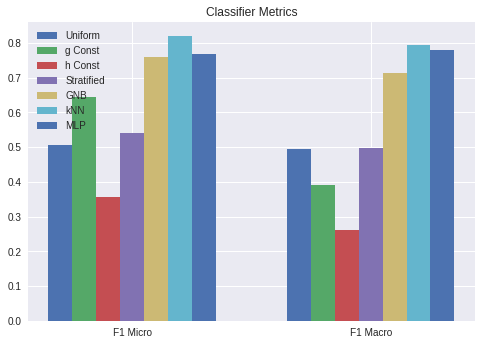

In [55]:
from matplotlib import pyplot as plt

x_axis = ['F1 Micro','F1 Macro']

ind = np.arange(len(x_axis))

plt.xticks(ind,x_axis)

plt.title("Classifier Metrics")
plt.bar(ind-0.3,dummy_metrics_uniform,width=0.1,label="Uniform") 
plt.bar(ind-0.2,dummy_metrics_g,width=0.1,label="g Const") 
plt.bar(ind-0.1,dummy_metrics_h,width=0.1,label="h Const") 
plt.bar(ind,dummy_metrics_stratified,width=0.1,label="Stratified") 
plt.bar(ind+0.1,[gnb_micro[1],gnb_macro[1]],width=0.1,label="GNB")
plt.bar(ind+0.2,[knn_micro[1],knn_macro[1]],width=0.1,label="kNN") 
plt.bar(ind+0.3,[mlp_micro[1],mlp_macro[1]],width=0.1,label="MLP")
plt.legend()

## Δ4. Μεταβολή Επίδοσης

In [87]:
dscore = np.array([[gnb_micro[1] - gnb_metrics[0] ,gnb_macro[1] - gnb_metrics[1]] ,
                   [knn_micro[1] - knn_metrics[0] ,knn_macro[1] - knn_metrics[1]],
                   [mlp_micro[1] - mlp_metrics[0] ,mlp_macro[1] - mlp_metrics[1]] ])

cols = ['f1-micro','f1-macro']

df = pd.DataFrame(dscore*100,columns = cols)
df['Classifier'] = ['GNB','kNN','MLP']
df.set_index('Classifier',inplace=True)

print('Βελτίωση Επίδοσης Ταξινομητών επί τοις εκατό (%) ')
df

Βελτίωση Επίδοσης Ταξινομητών επί τοις εκατό (%) 


,f1-micro,f1-macro
Classifier,,
GNB,3.259727,5.814840
kNN,1.910270,2.692547
MLP,11.987382,37.005081


## Δ5. Σχολιασμός Αποτελεσμάτων

Όπως βλέπουμε από τις μετρικές των ταξινομητών και το Bar Plot τους, η βέλτιστη επίδοση προκύπτει και για τις δύο μετρικές από τον kNN μετασχηματιστή. Σημειωτέον πως οι τιμές αυτές προκύπτουν για **MLP με ένα μόνο επίπεδο κρυφών νευρώνων** όπως αναγράφεται στην εκφώνηση της άσκησης. Δοκιμάζοντας να βάλουμε και τον αριθμό αυτό ως παράμετρο στην αναζήτηση πήραμε αποτελέσματα έως και 84% σε f1-micro score για 100 επίπεδα, μετρήσεις οι οποίες ωστόσο δεν συμπεριλαμβάνονται διότι δεν ζητούνται. 

Παρατηρούμε πως μεγαλύτερη βελτίωση επιδέχθηκε ο MLP Classifier, ο οποίος ωστόσο είχε δώσει εξ αρχής μικρά score και γι αυτό είχε μεγάλο περιθώριο βελτίωσης. Παρατηρούμε ακόμη πως και ο GNB βελτιώνεται ικανοποιητικά μέσω Grid Search Cross Validation, καθώς και ο kNN αν και σε μικρότερο βαθμό, έχοντας δώσει ωστόσο αρκετά καλά αποτελέσματα από το Μέρος Γ.

Ως προς το χρόνο εκτέλεσης βλέπουμε πως ο kNN χρειάζεται για το grid search 10-πλάσιο χρόνο από τον GNB έχοντας ωστόσο και περισσότερα ορίσματα προς διερεύνηση. 
To Μultilayer Perceptron είναι μακράν το πιο χρονοβόρο με χρόνο 100-πλάσιο από το χρόνο του GNB και 10-πλάσιο του kNN. Αυτό είναι ωστόσο εν μέρει και επειδή διαλέξαμε να παρουσιάσουμε τα αποτελέσματα για όλο το εύρος των μη-αριθμητικών υπερπαραμέτρων, όπως ακριβώς τα υπολογίσαμε. Μπορούσαμε για να παρουσιάσουμε καλύτερο χρόνο και να πειραματιστούμε περαιτέρω με τις αριθμητικές παραμέτρους, να κρατήσουμε σταθερές τις μη-αριθμητικές που μας έδωσε αυτή η GridSearchCV.     
Η αναλογία ωστόσο των χρόνων των ταξινομητών παραμένει ποιοτικά η ίδια, όπως παρατηρούμε και από τους χρόνους του τελικου fit για τον επιλεγμένο Classifier με τις υπερπαραμέτρους του.

Όπως και στο Γ, το GNB έχει χαμηλό f1-score για την κλάση h και υψηλό recall για την κλάση g. Ο kNN έχει 95% recall για την επικρατούσα κλάση και υψηλά (όπως φαίνεται και από το Bar Plot) f1 metrics, ενώ τέλος για το MLP παρατηρούμε την εντυπωσιακή βελτίωση σε σχέση με τις μετρικές του Μέρους Γ.